# Visualisations

In [44]:
import sys
import time
import re
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* We load the data from the Data Preparation Notebook.

In [2]:
merged_df = pd.read_csv('full.csv') # the whole data
gap_df = pd.read_csv('gap.csv')     # GAP citations
pac_df = pd.read_csv('pac.csv')     # GAP Packages citations

### Website

In [313]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3), title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the whole data'}, xlabel='Version', ylabel='Provided?'>

In [314]:
web_chart.plot(kind="pie")

<AxesSubplot:title={'center':'Website statistics on the whole data'}, xlabel='Version', ylabel='Website'>

<AxesSubplot:title={'center':'Website statistics on the Pure GAP data only'}, ylabel='Provided?'>

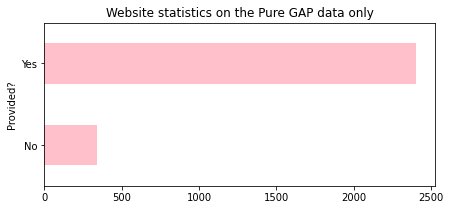

In [4]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Package citation data'}, ylabel='Provided?'>

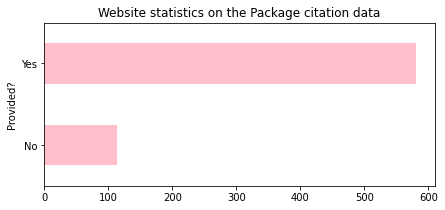

In [5]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')

* Website statistics by Year

In [202]:
site_year = merged_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
site_year_df = pd.DataFrame(data=site_year)
site_year_df

Website,No,Yes
Year,,
1992,1.0,NaN
1993,2.0,NaN
1994,1.0,NaN
1997,20.0,NaN
1998,14.0,2.0
1999,20.0,1.0
2000,45.0,16.0
2001,44.0,46.0
2002,30.0,37.0


<IPython.core.display.Javascript object>


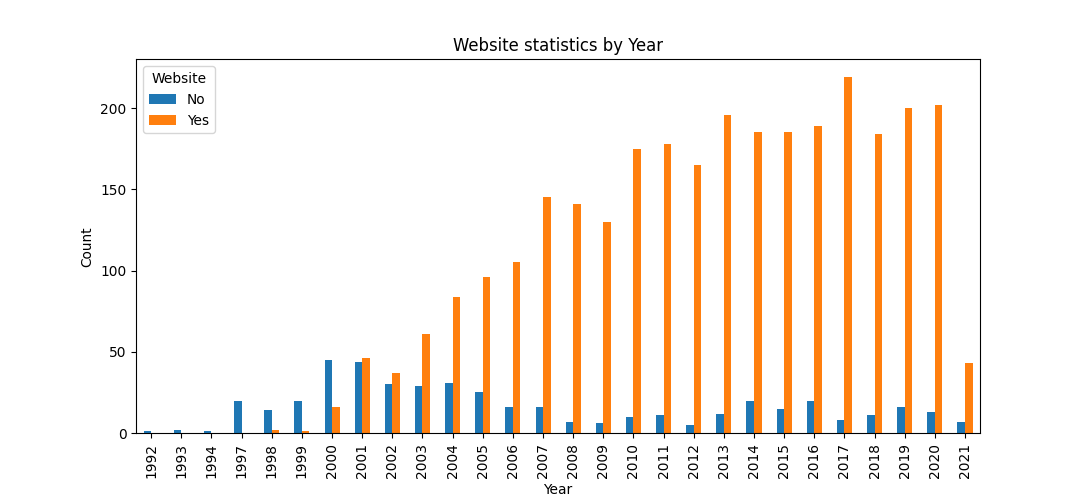

In [204]:
site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
plt.show()

* We can see that in the beginning, up to 2000 the number of citations without a website reference was much higher. Then this trend reverses. On this barchart we can also observe the sharp increase of recorded citations altogether starting from 1997 and reaching a pique in 2017. 

from pandas.plotting import parallel_coordinates

parallel_coordinates(all_years, "Year")

### Lenght
* Most citations are around 110 characters long.

In [210]:
merged_df['Lentght'] = merged_df['Citation'].apply(len)
cit_len = merged_df['Lentght'].plot(kind='hist', bins=50, figsize=(11,9), stacked=True, 
                         xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Lenght', 
                         xlabel="lenght")
cit_len.set_facecolor('#ebeced')


year_df = merged_df.sort_values(by='Year', ascending=False)
year_df.dropna()
num = year_df['Journal'].count()
year_df.plot(x='Year', y=num, kind='barh')


### Version

<IPython.core.display.Javascript object>


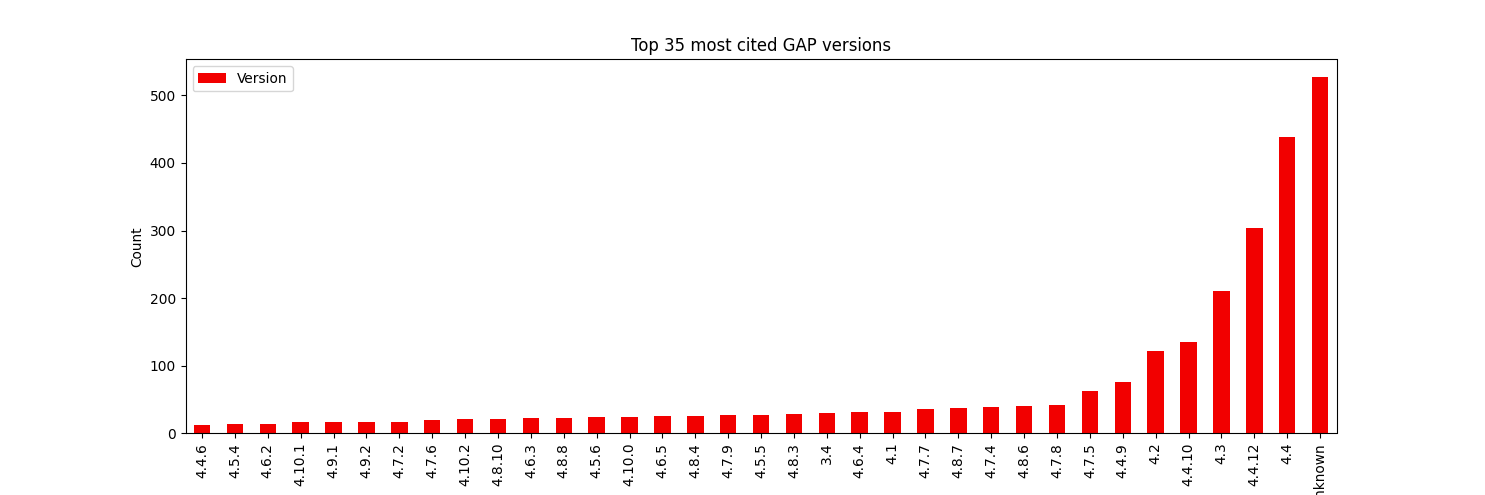

<AxesSubplot:title={'center':'Top 35 most cited GAP versions'}, xlabel='Version', ylabel='Count'>

In [219]:
ver = gap_df['Version'].value_counts()
ver = ver.head(35)
ver = ver.to_frame()
ver = ver.sort_values(by='Version', ascending=True) # sort chrono. compare version numbers
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 35 most cited GAP versions', xlabel='Version', 
                ylabel='Count', color='#f20000')

* We can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

### Authors

* Top 20 authors citing GAP and its packages in their work.

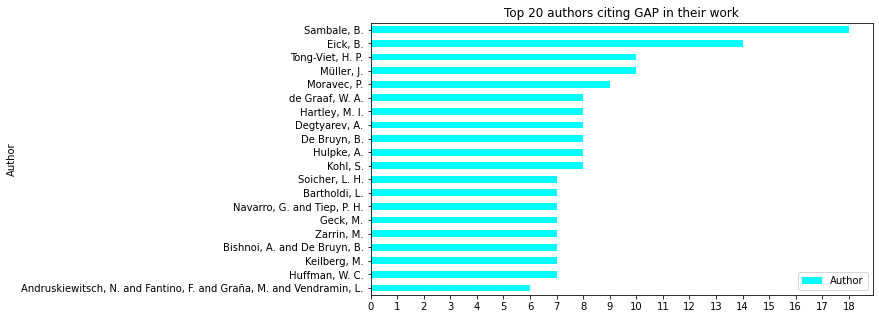

In [10]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [11]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Bächle, A. and Margolis, L.",10
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Soicher, L. H.",8
"Eick, B.",7
"Eick, B. and Horn, M.",6
"Douglas, A. and Repka, J.",6
"Kohl, S.",6
"Fernandes, V. H.",5
"de Graaf, W. A.",5
"Linton, S. and Hammond, K. and Konovalov, A. and Brown, C. and Trinder, P. W. and Loidl, H. -. and Horn, P. and\nRoozemond, D.",5


* Accuracy + site, ver, year
* Countries + to be provided
* GET function + simplicity is key

### Year

##### Barchart dislaying number of GAP citations per year.

* GAP citation counts for each year, sorted chronologically.

<IPython.core.display.Javascript object>


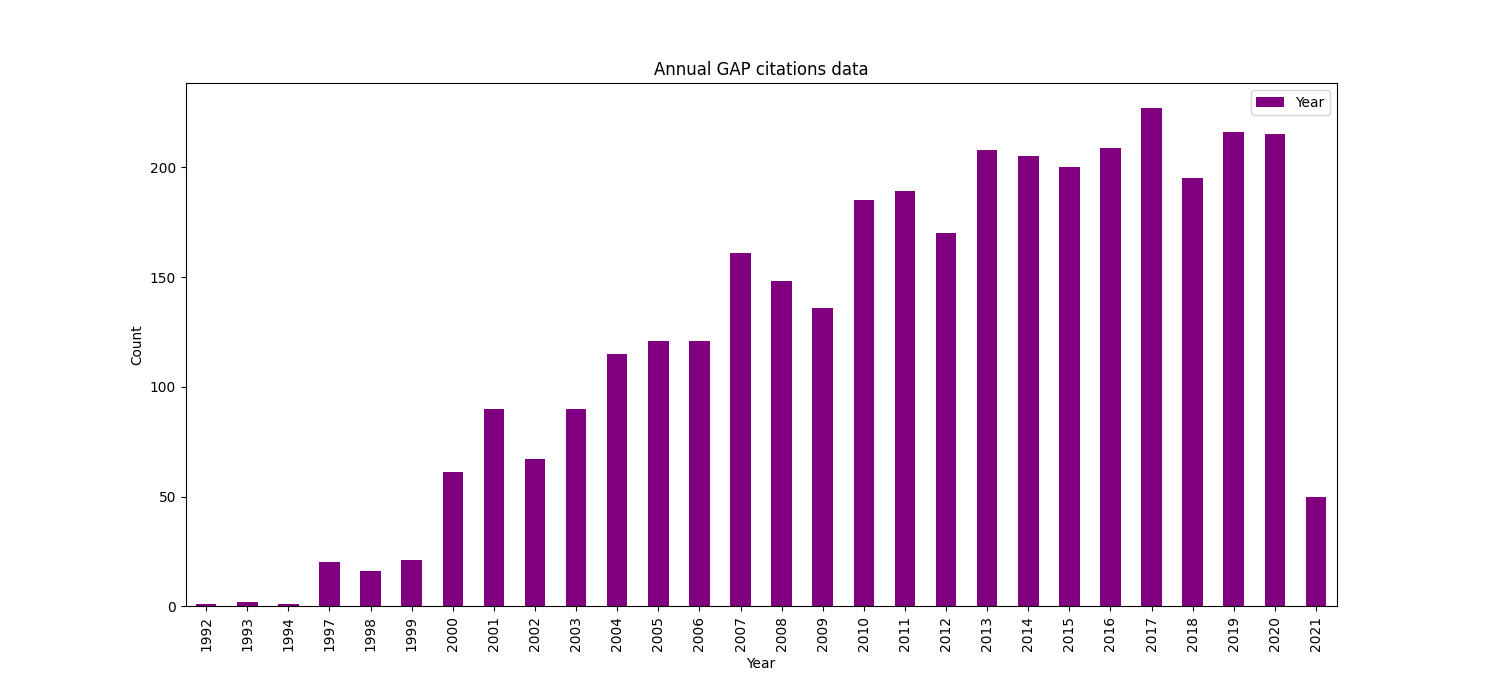

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

In [220]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(15, 7), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')

### Top 20 journals citing GAP.

In [13]:
top_journals = gap_df['Journal'].value_counts()
top_20 = pd.DataFrame(top_journals.head(20))
top_20.reset_index()

,index,Journal
0,J. Algebra,380
1,Comm. Algebra,176
2,J. Symbolic Comput.,96
3,Discrete Math.,87
4,J. Algebra Appl.,85
5,J. Group Theory,69
6,Internat. J. Algebra Comput.,59
7,Des. Codes Cryptogr.,59
8,J. Pure Appl. Algebra,56
9,LMS J. Comput. Math.,46


Only for alternative, useful for copy/paste plain text - quick to load.
Try to allign on the left - journals.

In [14]:
headers = ['Journal name', 'GAP Citations count']
print(tabulate(top_20, headers = headers, tablefmt = 'pretty'))

+------------------------------+---------------------+
|         Journal name         | GAP Citations count |
+------------------------------+---------------------+
|          J. Algebra          |         380         |
|        Comm. Algebra         |         176         |
|     J. Symbolic Comput.      |         96          |
|        Discrete Math.        |         87          |
|       J. Algebra Appl.       |         85          |
|       J. Group Theory        |         69          |
| Internat. J. Algebra Comput. |         59          |
|     Des. Codes Cryptogr.     |         59          |
|    J. Pure Appl. Algebra     |         56          |
|     LMS J. Comput. Math.     |         46          |
|       Israel J. Math.        |         38          |
|      Experiment. Math.       |         37          |
|     European J. Combin.      |         37          |
|       J. Combin. Des.        |         36          |
|         Math. Comp.          |         36          |
|     Arch

* Journals by year

In [235]:
jou_year = merged_df.groupby(['Year'])['Journal'].count()
jou_year = pd.DataFrame(data=jou_year)
jou_year.head

<bound method NDFrame.head of       Journal
Year         
1992        1
1993        2
1994        1
1997       20
1998       16
1999       21
2000       61
2001       90
2002       67
2003       90
2004      115
2005      121
2006      121
2007      161
2008      148
2009      136
2010      185
2011      189
2012      170
2013      208
2014      205
2015      200
2016      209
2017      227
2018      195
2019      216
2020      215
2021       50>

### The most frequent type of work citing GAP: we can see that GAP is predominantly cited in articles - 2976 times.

In [221]:
types_pub = pd.DataFrame(merged_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

,GAP Citations Count
Publication Type,
article,3393
incollection,43
inproceedings,4


### Accuracy

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Score', ylabel='Count'>

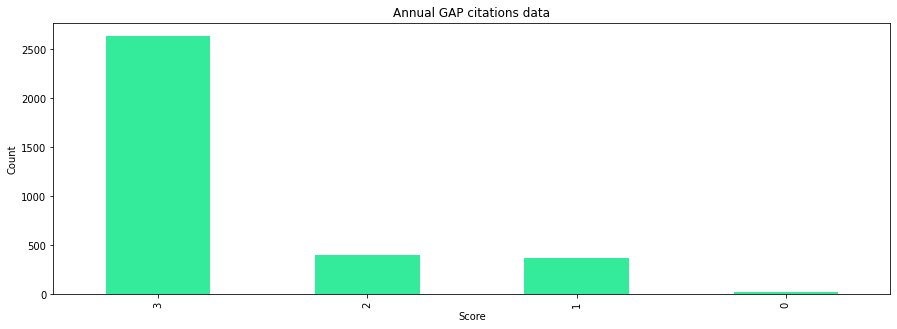

In [16]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="bar", figsize=(15, 5), title='GAP citations Acuracy data', xlabel='Score', 
                ylabel='Count', color='#34eb9b')

Trying to get average score per year by dividing the sum of scores to the number of citations for that year

* Annual average of Accuracy sores

<IPython.core.display.Javascript object>


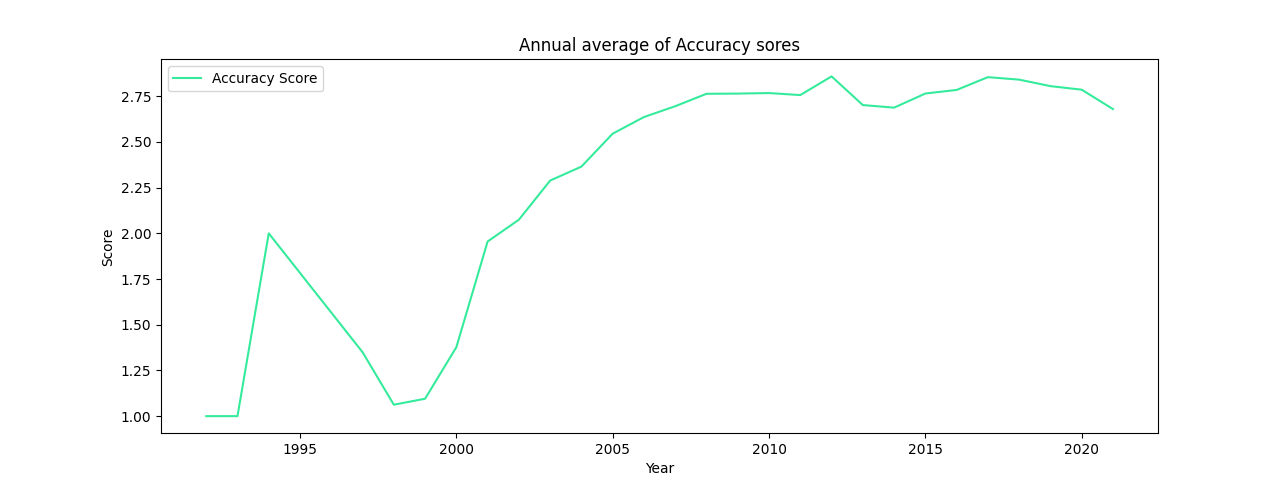

<AxesSubplot:title={'center':'Annual average of Accuracy sores'}, xlabel='Year', ylabel='Score'>

In [239]:
ttt = merged_df.groupby('Year')['Accuracy Score'].mean()
ttt = pd.DataFrame(data=ttt)
ttt.plot(kind='line', figsize=(13, 5), title='Annual average of Accuracy sores', xlabel='Year', 
                ylabel='Score', color='#34eb9b')

<IPython.core.display.Javascript object>


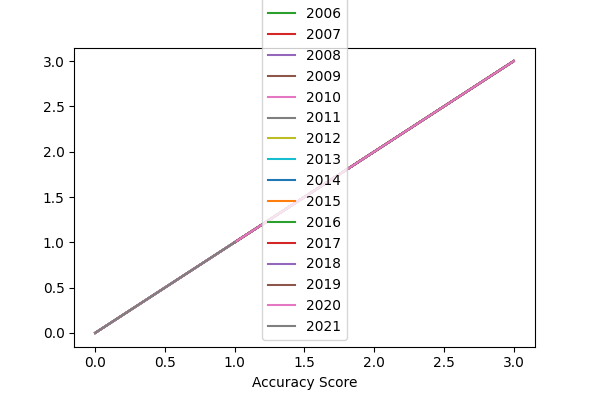

<AxesSubplot:xlabel='Accuracy Score'>

In [245]:
df2 = gap_df.groupby(['Accuracy Score', 'Year'])['Accuracy Score'].mean().unstack('Year')
df2.plot()

### Releases by year

We will use `gap_df` containing only GAP citations with versions provided, all other entries such as Package citations are not needed.

In [19]:
versions_cited = gap_df['Version'].unique()

In [20]:
versions_cited

array(['Unknown', '4.7.5', '4.4.12', '4.7.8', '4.3', '4.4', '4.4.4',
       '4.6.4', '4.7.2', '4.6.5', '4.7.9', '4.8.8', '4.8.9', '4.4.10',
       '4.5.7', '4.7.4', '4.7.7', '4.2', '4.6.12', '4.1', '4.10.0',
       '4.8.6', '4.8.2', '4.10.2', '4.11.0', '4.4.2', '4.8.3', '10.1109',
       '4.8.7', '4.6', '2.12', '4.9.1', '4.4.9', '4.8.4', '4.6.2', '1.2',
       '4.9.3', '4.8.10', '4.5', '4.4.6', '4.4.7', '4.5.5', '1.4',
       '1.3.3', '4.4.11', '5.7', '1.5.4', '4.10.1', '1.0.0',
       '4.4.10.2007', '4.6.3', '1405.5063', '1.1', '3.4', '4.8.5',
       '4.5.6', '4.11', '4.10', '4.9.2', '4.7.6', '4.6.9', '4.5.4',
       '3.4.4', '4.08.10', '0710.3267', '0911.5589', '4.8', '4.9.0',
       '4.7', '3.3', '2.19', '0.97', '10.14760', '1.2.1', '2.2.0',
       '1.5.1', '3.0', '2.0.0', '4.4.2006', '4.5.3', '2.1.0', '3.1.0',
       '3.4.3', '1.0', '55.0810.04', '4.6.1', '4.4.3', '4.8.1', '1.9.6',
       '1804.09707', '3.1', '4.4.5', '1.4.0', '4.46', '4.9', '4.49',
       '10.01.16', '3.2'], dtype

In [21]:
release_dates = { 
    # dates from archive timestamps
    '4.8.2': 2016, # 2016/02/20
    '4.7.9': 2015, # 2015/11/29
    '4.7.8': 2015, # 2015/06/09
    '4.7.7': 2015, # 2015/02/13
    '4.7.6': 2014, # 2014/11/15
    '4.7.5': 2014, # 2014/05/24
    '4.7.4': 2014, # 2014/02/20
    '4.7.3': 2013, # 2014/02/15
    '4.7.2': 2013, # 2013/12/01
    '4.7': 2013,
    '4.6.5': 2013, # 2013/07/20
    '4.6.4': 2013, # 2013/05/04
    '4.6.3': 2013, # 2013/03/18
    '4.6.2': 2013, # 2013/02/02
    '4.5.7': 2012, # 2012/12/14
    '4.5.6': 2012, # 2012/09/16
    '4.5.5': 2012, # 2012/07/16
    '4.5.4': 2012, # 2013/06/04
    '4.5': 2012, 
    # dates below from file creation
    '4.4.12': 2008, # 2008/12/16
    '4.4.11': 2008, # 2008/12/08
    '4.4.10': 2007, # 2007/10/05
    '4.4.9': 2006,  # 2006/11/02
    '4.4.8': 2006,  # 2006/09/29
    '4.4.7': 2006,  # 2006/03/17
    '4.4.6': 2005,  # 2005/09/02
    '4.4.5': 2005,  # 2005/05/13
    '4.4.4': 2004,  # 2004/12/22
    # dates below from http://www.gap-system.org/Download/Updates/index.html
    '4.4.3': 2004,   # May 2004
    '4.4.2': 2004,  # April 2004
    # dates from http://www.gap-system.org/Doc/History/history.html
    # if not stated otherwise
    '4.4': 2004, 
    '4.3': 2002, 
    '4.2': 2000, # http://www.gap-system.org/ForumArchive/Linton.1/Steve.1/Release_.3/1.html
    '4.1': 1999, 
    '3.4': 1997, # assume http://www.gap-system.org/Doc/History/preface_3.4.4.html
}

In [22]:
release_dates.keys()

dict_keys(['4.8.2', '4.7.9', '4.7.8', '4.7.7', '4.7.6', '4.7.5', '4.7.4', '4.7.3', '4.7.2', '4.7', '4.6.5', '4.6.4', '4.6.3', '4.6.2', '4.5.7', '4.5.6', '4.5.5', '4.5.4', '4.5', '4.4.12', '4.4.11', '4.4.10', '4.4.9', '4.4.8', '4.4.7', '4.4.6', '4.4.5', '4.4.4', '4.4.3', '4.4.2', '4.4', '4.3', '4.2', '4.1', '3.4'])

In [23]:
def release_year(version):
    if version in release_dates.keys():
        return release_dates[version]
    else:
        return 'Unknown'

In [246]:
release_year('3.4')

1997

In [248]:
gap_df['ReleaseYear'] = gap_df['Version'].map(release_year)

In [249]:
data = gap_df['ReleaseYear'].value_counts()

* Number of Citations by year of cited GAP release, in textual and graphic forms.

In [250]:
data

Unknown    930
2004       449
2008       307
2002       211
2007       135
2000       122
2014       120
2013       112
2015       105
2006        86
2012        84
1999        32
1997        30
2005        13
2016        10
Name: ReleaseYear, dtype: int64

<AxesSubplot:title={'center':'Citations by year of cited GAP release'}, xlabel='Years', ylabel='Count'>

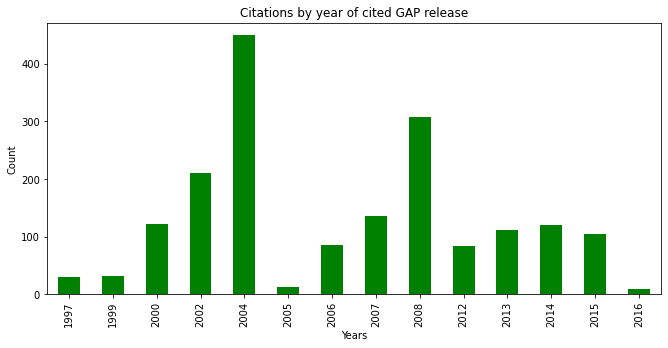

In [28]:
data.loc[sorted(data.index.intersection(range(1997, 2021)))].plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

<AxesSubplot:title={'center':'pie'}, ylabel='Frequency'>

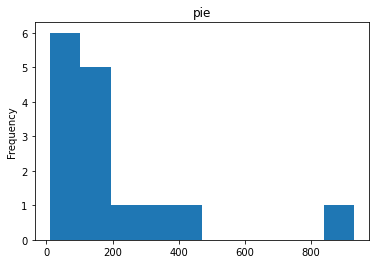

In [30]:
data.plot(kind="hist", title="pie")

all_years = corpus_df.groupby(['year','ReleaseYear'])['Year'].count()
all_years

In [33]:
years = gap_df['Year'].unique()
dat = gap_df['Year'].value_counts()
g = gap_df['Version'].value_counts()
ver = gap_df['Version'].unique()

In [34]:
gap_df['Publication Type'].value_counts()

article          2703
incollection       39
inproceedings       4
Name: Publication Type, dtype: int64

In [98]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count()
yea = pd.DataFrame(data=yea)
yea

Publication Type
Publication Type Year                  
article          1992                 1
                 1993                 2
                 1994                 1
                 1997                20
                 1998                15
                 1999                19
                 2000                46
                 2001                65
                 2002                46
                 2003                72
                 2004               100
                 2005               106
                 2006               101
                 2007               133
                 2008               124
                 2009               110
                 2010               150
                 2011               144
                 2012               137
                 2013               161
                 2014               151
                 2015               149
                 2016               143
                 2017               179
                 2018               152
                 2019               162
                 2020               174
                 2021                40
incollection     1998                 1
                 2000                10
                 2001                11
                 2002                 9
                 2003                 7
                 2004                 1
inproceedings    2001                 1
                 2003                 3

array([<AxesSubplot:title={'center':'Publication Type'}, xlabel='Years', ylabel='Count'>],
      dtype=object)

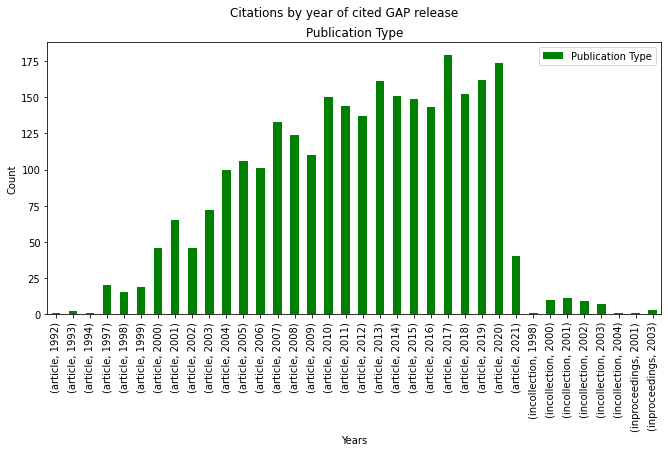

In [101]:
yea.plot(kind="bar", subplots=True,  
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

In [144]:
jou = gap_df.groupby('Year')['Journal'].unique()
jou = pd.DataFrame(data=jou)
jou

,Journal
Year,
1992,[Math. Comp.]
1993,[Math. Comp.]
1994,[Math. Comp.]
1997,"[Proc. London Math. Soc. (3), J. Algebra, Tran..."
1998,"[J. Math. Soc. Japan, J. Algebraic Combin., Ma..."
1999,"[Trans. Amer. Math. Soc., J. Algebra, Pacific ..."
2000,"[J. Combin. Des., Internat. J. Algebra Comput...."
2001,"[Houston J. Math., Quaest. Math., Turkish J. M..."
2002,"[Acta Sci. Math. (Szeged), Internat. J. Algebr..."


In [38]:
lee = gap_df.groupby('Lentght')
lee.size()

Lentght
26      1
27      3
31      1
32      1
36      1
       ..
288     2
298     1
327     1
434     1
1076    1
Length: 199, dtype: int64

In [141]:
au7 = gap_df['Author'].unique()
au7

array(['Abas, M. and Vetrík, T.',
       'Abbas, A. and Assi, A. and García-Sánchez, P. A.',
       'Abdolghafourian, A. and Iranmanesh, M. A.', ..., 'Sidki, S. N.',
       'Tian, Y. and Lu, C.', 'Zhurtov, A. K.'], dtype=object)

Column `delay` = release year - year ???

In [267]:
gap_df[gap_df['ReleaseYear'] != 'Unknown']

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght,Accuracy Score,Lenght,ReleaseYear,Delay
1,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A ...,2019,article,"The GAP Group: GAP—groups, algorithms, and pro...",4.7.5,Yes,125,3,125,2014,0
2,3354065,"Abdolghafourian, A. and Iranmanesh, M. A.",Comm. Algebra,2015,article,"The GAP – Groups, Algorithms and Programming. ...",4.4.12,Yes,87,2,87,2008,0
3,3646312,"Abdolghafourian, A. and Iranmanesh, M. A. and ...",J. Pure Appl. Algebra,2017,article,"The GAP Group, GAP–Groups, Algorithms, and Pro...",4.7.8,Yes,95,3,95,2015,0
5,2287843,"Abdollahi, A. and Jafarian Amiri, S. M. and Ha...",Houston J. Math.,2007,article,"The GAP Group, GAP - Groups, Algorithms, and P...",4.3,Yes,105,3,105,2002,0
6,2175389,"Abdollahi, A. and Ataei, M. J. and Jafarian Am...",Comm. Algebra,2005,article,"The GAP Group, GAP-Groups, Algorithms, and pro...",4.3,Yes,103,3,103,2002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,2924550,"Darafsheh, M. R. and Monfared, M. D.",Ukrainian Math. J.,2011,article,"The Gap Group, Gap-Groups, Algorithms and Prog...",4.4,Yes,101,3,101,2004,0
2718,2421122,"Fowler, R. and Röhrle, G.",Pacific J. Math.,2008,article,"The Gap Group, Groups, Algorithms and Programm...",4.3,Yes,115,3,115,2002,0
2723,1658168,"Guralnick, R. and Penttila, T. and Praeger, C....",Proc. London Math. Soc. (3),1999,article,"M. Schönert (ed.), Gap-3.4, manual, RWTH Aache...",3.4,No,54,1,54,1997,0
2724,1769294,"Hoffman, C.",J. Algebra,2000,article,"M. Schönert (Ed.), ""Gap-3.4, Manual,"" RWTH Aac...",3.4,No,56,1,56,1997,0


In [284]:
def set_delay(series):
    rel_year = series['ReleaseYear']
    year = series['Year']
    delay = series['Delay']
    if rel_year != 'Unknown':
        #print('***Package***:')
        delay = year - rel_year
    return delay

In [285]:
gap_df['Delay'] = gap_df.apply(set_delay, axis=1)

* Delay in picking up new GAP releases

In [300]:
tail = gap_df['Delay'].value_counts()
tail = pd.DataFrame(data=tail)
tail = tail.sort_index(ascending=False)
tail

In [291]:
gap_df.loc[gap_df['Delay'] < 0]

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght,Accuracy Score,Lenght,ReleaseYear,Delay
2050,1958966,"Moore, E. H. and Pollatsek, H.",Des. Codes Cryptogr.,2003,article,"M. Schönert et al., GAP: Groups, Algorithms an...",4.4,No,140,2,140,2004,-1.0


<IPython.core.display.Javascript object>


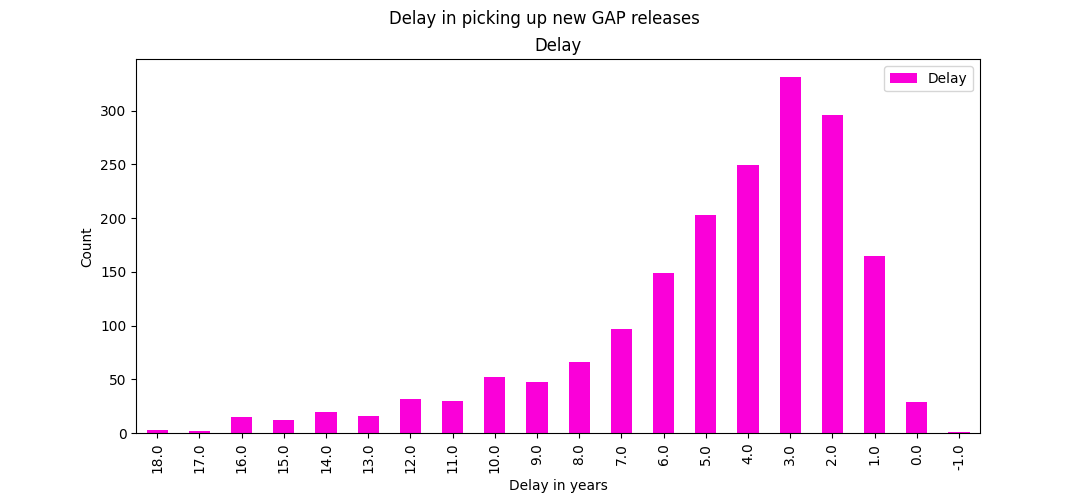

In [307]:
tail.plot(kind="bar", subplots=True,  
                figsize=(11, 5), title='Delay in picking up new GAP releases', xlabel='Delay in years', 
                ylabel='Count', color='#fa00d9')
plt.show()

In [40]:
df2 = gap_df.groupby(['Year', 'ReleaseYear'])['ReleaseYear'].count().unstack('Year').fillna(0)
df2.head(11)

Year,1992,1993,1994,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ReleaseYear,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,0.0,5.0,1.0,2.0,7.0,5.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,6.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,17.0,27.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,7.0,1.0,7.0,2.0,3.0,1.0,0.0,2.0,3.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,30.0,19.0,22.0,15.0,19.0,12.0,14.0,10.0,15.0,0.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,6.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,10.0,6.0,8.0,6.0,6.0,3.0,2.0,1.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.0,61.0,32.0,26.0,13.0,15.0,10.0,6.0,3.0,0.0


#objects = gap_df['Year']

plt.bar(lee, years, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

plt.show()

In [148]:
gap_df

,MR,Author,Journal,Year,Publication Type,Citation,Version,Website,Lentght,Accuracy Score,Lenght,ReleaseYear
0,4056124,"Abas, M. and Vetrík, T.",Theoret. Comput. Sci.,2020,article,"GAP – Groups, algorithms, programming - a syst...",Unknown,Yes,104,2,104,Unknown
1,3942387,"Abbas, A. and Assi, A. and García-Sánchez, P. A.",Rev. R. Acad. Cienc. Exactas Fís. Nat. Ser. A ...,2019,article,"The GAP Group: GAP—groups, algorithms, and pro...",4.7.5,Yes,125,3,125,2014
2,3354065,"Abdolghafourian, A. and Iranmanesh, M. A.",Comm. Algebra,2015,article,"The GAP – Groups, Algorithms and Programming. ...",4.4.12,Yes,87,2,87,2008
3,3646312,"Abdolghafourian, A. and Iranmanesh, M. A. and ...",J. Pure Appl. Algebra,2017,article,"The GAP Group, GAP–Groups, Algorithms, and Pro...",4.7.8,Yes,95,3,95,2015
4,1864795,"Abdollahi, A.",Houston J. Math.,2001,article,"M. Schönert et al. GAP - Groups, Algorithms, a...",Unknown,No,168,1,168,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2741,2371432,"Rojas, A. M.",Rev. Mat. Iberoam.,2007,article,"G.A.P. Groups, Algorithm and Programming Compu...",Unknown,Yes,98,2,98,Unknown
2742,1801202,"Shaw, R.",Des. Codes Cryptogr.,2000,incollection,"L.H. Soicher, GRAPE: a system for computing wi...",Unknown,Yes,327,2,327,Unknown
2743,2558870,"Sidki, S. N.",J. Algebra,2009,article,"L. Bartholdi, Functionally recursive groups, h...",Unknown,Yes,102,2,102,Unknown
2744,2824780,"Tian, Y. and Lu, C.",J. Ind. Manag. Optim.,2011,article,"X. Sun, C. Liu, D. Li and J. Gao, On duality g...",Unknown,Yes,158,2,158,Unknown


<IPython.core.display.Javascript object>


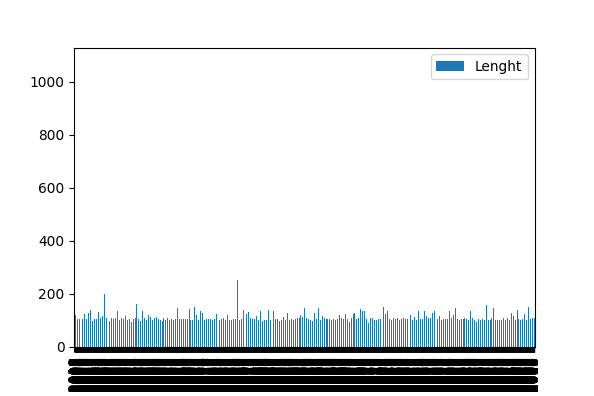

<AxesSubplot:xlabel='Year'>

In [151]:
top_medians = gap_df[gap_df["Accuracy Score"] > 2].sort_values("Accuracy Score")
top_medians.plot(x='Year', y='Lenght', kind='bar')

In [186]:
med = gap_df.groupby(['Lenght'])
#med = med.sort_values(by='Lenght', ascending=False)
med

In [177]:
plt.plot(top_medians["Year"], top_medians["Lenght"].sum())

ValueError: x and y must have same first dimension, but have shapes (2080,) and (1,)

# Interactive

In [48]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import cufflinks as cf

* Filter the citations data by year

In [105]:
years_list = gap_df['Year'].unique()
years_list

array([2020, 2019, 2015, 2017, 2001, 2007, 2005, 2008, 2010, 2009, 2011,
       2014, 2016, 2018, 2013, 1997, 2004, 2012, 2002, 2003, 2000, 2021,
       2006, 1999, 1998, 1993, 1992, 1994], dtype=int64)

In [104]:
# Interact with specification of arguments
@interact
def show_articles_more_than(Year=years_list, 
                            operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        return gap_df.loc[gap_df[column] == Year]
    if operator == 'Up to':
        return gap_df.loc[gap_df[column] <= Year]
    if operator == 'After':
        return gap_df.loc[gap_df[column] > Year]

interactive(children=(Dropdown(description='Year', options=(1992, 1993, 1994, 1997, 1998, 1999, 2000, 2001, 20…

In [87]:
# Interact with specification of arguments
@interact
def show_articles_more_than(column=['Year', 'Accuracy Score', 'Lenght'], 
                            x=(1, 3000, 1)):
    return gap_df.loc[gap_df[column] > x]

interactive(children=(Dropdown(description='column', options=('Year', 'Accuracy Score', 'Lenght'), value='Year…

Versions / year
top authors / year
data per year

In [ ]:
def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

In [59]:
def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

interactive(children=(Text(value='', description='author'), Dropdown(description='citation', options=('GAP – G…

<function __main__.<lambda>(author, citation)>

In [63]:
def get_aut(db, author):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    return auth_info


interact(get_aut(merged_df, author), author = '')

AttributeError: 'Series' object has no attribute 'split'

In [97]:
yeaaa = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

<function __main__.y_selector(year)>

<IPython.core.display.Javascript object>


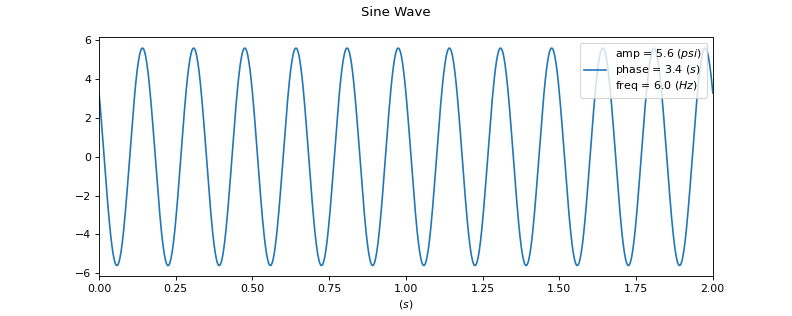

interactive(children=(FloatSlider(value=1.0, description='Amp:', max=10.0, min=1.0), FloatSlider(value=0.0, de…

In [115]:
import ipywidgets as widgets
from IPython.display import display




%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

In [122]:
t=pd.DataFrame({'string':['i live here','you live in eltham','machine learning','learning english','go home','go back','live home'],
                'number':[1,3,2,3,1,2,4],
                'word':['a','haha','runing over there','abcdefg','aaa','bye','hou']})

def myFUN_searchString(value,string):
    s=string.split(' ')
    return value in s

def myFUN_search(value):
    t.loc[:,'Flag']=''
    t.loc[:,'Flag']=[myFUN_searchString(value,x) for x in t.loc[:,'string']]
    return t.loc[:,'Flag']

keyword=widgets.Text(
    value='electricity',
    placeholder='Type something',
    description='keyword:',
    disabled=False
)
display(keyword)


button = widgets.Button(description="search")
display(button)

output = widgets.Output()

@output.capture()
def on_button_clicked(b):
    t.loc[:,'Flag']=myFUN_search(keyword.value)
    t1=t.loc[(t['Flag'])]
    t1.drop(['Flag'],axis=1,inplace=True)
    t1.reset_index(drop=True,inplace=True)
    if t1.shape[0]>30:
        t1=t1.loc[0:30]

    display(t1)

button.on_click(on_button_clicked)
display(output)

Text(value='electricity', description='keyword:', placeholder='Type something')

Button(description='search', style=ButtonStyle())

Output()